# Lineare Regression - Projekt Übung - Aufgaben

Glückwunsch, du hast deinen ersten Auftrag mit einer Ecommerce Firma aus New York erhalten. Diese Firma verkauft online Kleidung bietet aber auch Kleidungs- und Styleberatungen in Läden an. Kunden können in den Laden kommen, sich mit einem Stylisten beraten und anschließend per App oder Webseite die Kleidung kaufen, die sie möchten.

Die Firma ist gerade dabei zu entscheiden, ob sie ihren Fokus lieber auf die App oder die Webseite legen sollen. Dein Job ist es sie bei dieser Entscheidung zu unterstützen. Los geht's!

Folge den Anweisungen, um die Kundendaten zu analysieren (selbstverständlich ohne echte Kreditkartennummern und E-Mail-Adressen).

## Imports

**Importiere pandas, numpy, matplotlib und seaborn. Setze außerdem %matplotlib inline.**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Erhalte die Daten

Wir arbeiten mit der "Ecommerce Customers" CSV-Datei von der Firma. Sie beinhaltet Informationen wie E-Mail-Adressen, Addressen usw. Außerdem haben wir numerische Werte in folgenden Spalten vorliegen:

* Avg. Session Length: Durchschnittliche Länge einer Style beratung im Laden.
* Time on App: Durchschnittlich verbrachte Zeit in der App in Minuten.
* Time on Website: Durchschnittlich verbrachte Zeit auf der Homepage in Minuten.
* Length of Membership: Anzahl der Jahre die ein Kunde bereits Mitglied ist.

**Lese die "Ecommerce Customers" CSV-Datei als DataFrame namens "customers" ein.**

In [4]:
df = pd.read_csv('Ecommerce Customers')

**Schaue dir den Head von customers an und wende die info() und describe() Methode an.**

In [6]:
df.tail()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510
499,hannahwilson@davidson.com,49791 Rachel Heights Apt. 898\nEast Drewboroug...,DarkMagenta,33.715981,12.418808,35.771016,2.735160,497.778642


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [8]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Explorative Daten Analyse

**Nehmen wir die Daten unter die Lupe!**

Für den Rest der Übung werden wir nur die numerischen Dten in der CSV-Datei verwenden.
___

**Nutze Seaborn um ein jointplot zu erstellen, um die Zeit auf der Webseite (en. Time on Website) und die jährliche ausgegebene Summe (en. Yearly Amount Spent) zu vergleichen. Ergibt die Korrelation Sinn?**

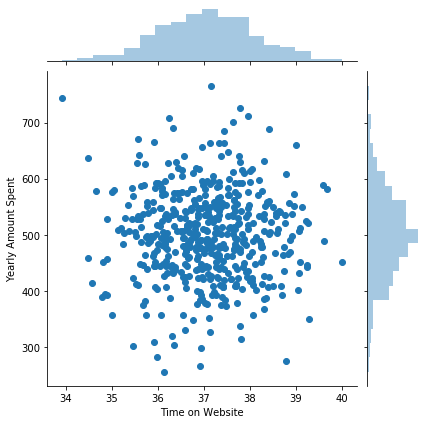

In [9]:
sns.jointplot(x="Time on Website",y="Yearly Amount Spent",data=df,kind="scatter")

**Wiederhole das gleiche für die Zeit in der App (en. Time on App).**

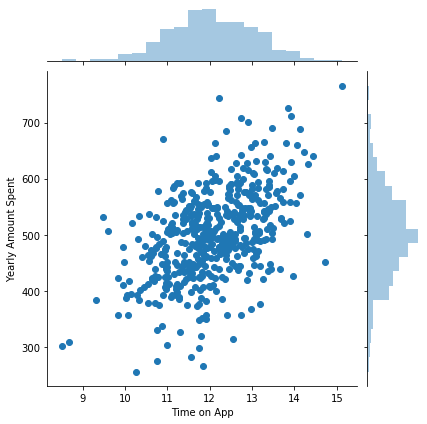

In [10]:
sns.jointplot(x="Time on App",y="Yearly Amount Spent",data=df,kind="scatter")

**Erstelle jetzt mit jointpolit ein 2D Hex Bin Plot, das die Zeit in der App und die Länge der Mitgliedschaft (en. Length of Membership) vergleicht.**

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')


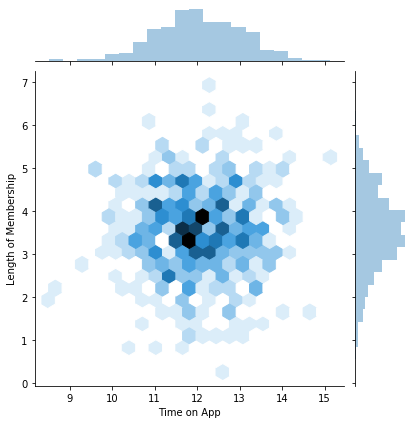

In [13]:
print(df.columns)
sns.jointplot(x="Time on App",y="Length of Membership",data=df,kind="hex")

**Untersuchen wir diese Art von Beziehung für den ganzen Datensatz. Erstelle mit pairplot das nachfolgende Diagramm.**

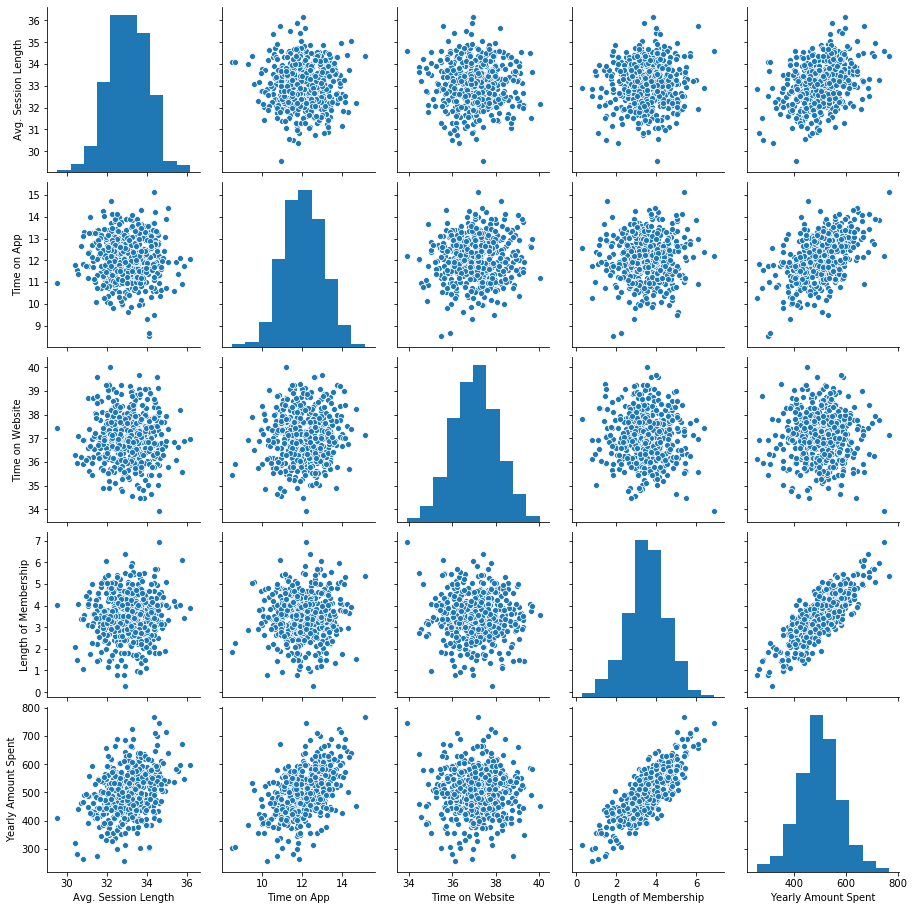

In [14]:
sns.pairplot(df)

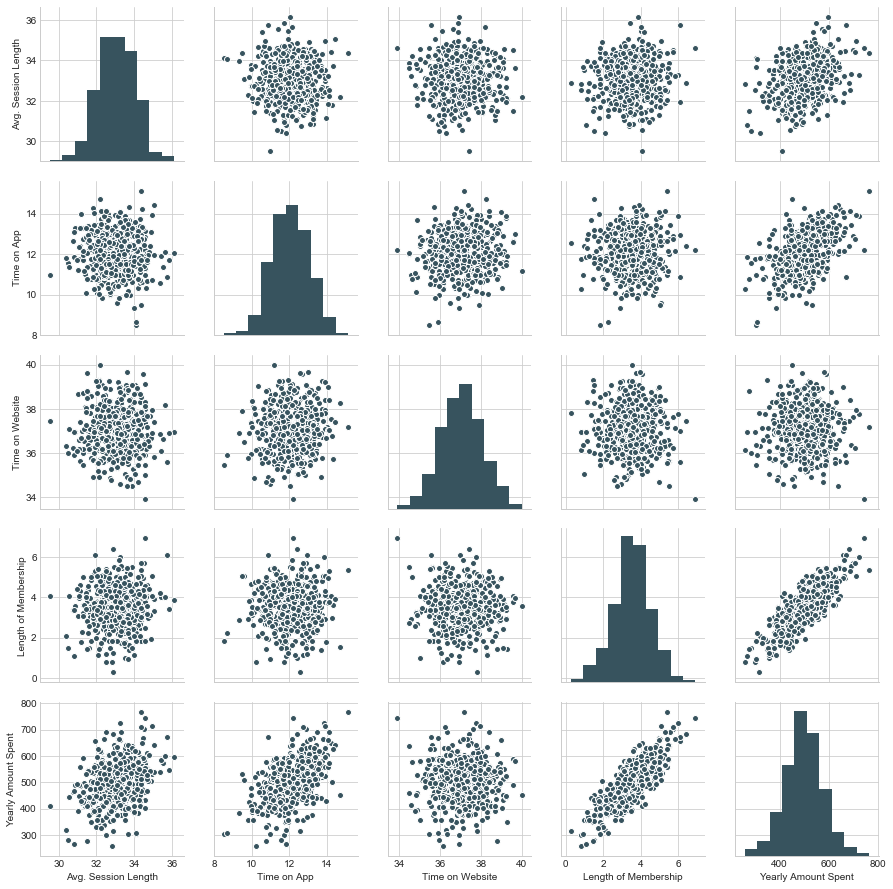

**Anhand dieser Grafik: Was scheint am meistenmit den jährlichen Ausgaben zu korrelieren?**

length of Membership

**Erstelle ein linear model plot (mit Hilfe von searborn's lmplot) von jährlichen Ausgaben vs. Länge der Mitgliedschaft.**

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')


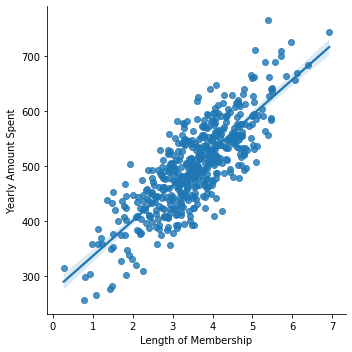

In [16]:
print(df.columns)
sns.lmplot(x="Length of Membership",y="Yearly Amount Spent", data=df)

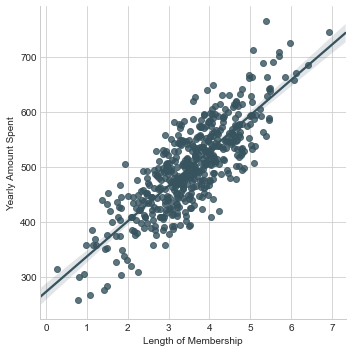

## Trainings- und Testdaten

Jetzt wo wir unsere Daten ein wenig untersucht haben können wir fortschreiten und Daten in Trainings- und Testdaten aufteilen. 

**Setze eine Variable X gleich den numerischen Features der Kunden und eine Variable Y gleich der "Yearly Amount Spent" Spalte.**

kann man schön mittels einer SK-Learn Pipeline implementieren

In [19]:
y = df['Yearly Amount Spent']

In [20]:
X = df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [35]:
colnames = (X.columns)

**Nutze model_selection.train_test_split aus sklearn, um die Daten in Trainings- und Testdaten zu trennen. Setze dabei test_size=0.3 und random_state=101.**

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Das Modell trainieren

Als nächstes können wir unser Modell mit den Trainingsdaten trainieren!

**Importiere LinearRegression aus sklearn.linear_model.**

In [23]:
from sklearn.linear_model import LinearRegression


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Erstelle eine Instanz von LinearRegression() namens lm.**

In [18]:
lm = LinearRegression()


**Trainiere lm mit den Trainingsdaten.**

In [19]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**Gebe die Koeffizienten des Modells aus.**

In [24]:
print(lm.coef_)

[25.98154972 38.59015875  0.19040528 61.27909654]


## Testdaten voraussagen

Nachdem wir unser Modell trainiert haben können wir seine Güte mit den Testdaten überprüfen.

**Nutze lm.predict(), um die X_test Daten vorherzusagen.**

In [25]:
predictions = lm.predict(X_test)

**Erstelle ein Scatterplot mit den echten Testwerten im vergleich zu den vorhergesagten.**

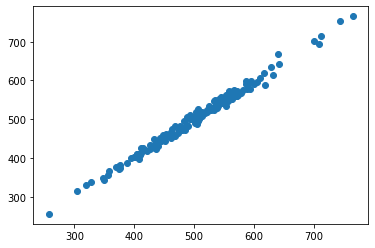

In [26]:
plt.scatter(y_test,predictions)

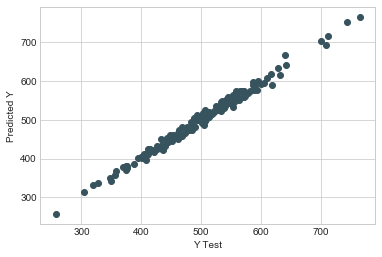

## Das Modell bewerten

Lass uns unser Modell indem wir die Residual Sum of Squares und die erklärte Varianz (R^2) ausrechnen.

**Berechne MAE, MSE und RMSE.**

*Hinweis: Die Lektion zur linearen Regression verrät dir mehr zu den Werten.*

In [27]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.228148653430837
MSE: 79.81305165097451
RMSE: 8.933815066978637


## Residuen

Du solltest ein sehr gutes Modell mit einem guten Modelfit erhalten haben. Lass uns schnell noch die Residuen untersuchen, um sicher zu gehen, dass alles mit unseren Daten okay war.

**Erstelle ein Histogramm der Residuen und gehe sicher, dass es normalverteilt aussieht. Nutze entweder searborn distplot oder einfach plt.hist().**

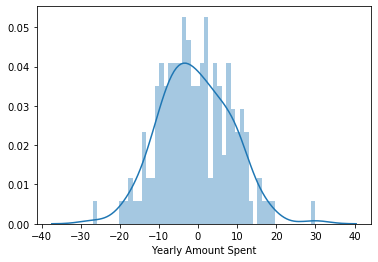

In [28]:
sns.distplot((y_test-predictions),bins=50);

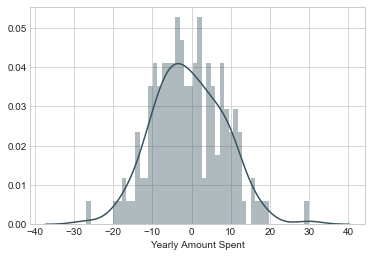

## Schlussfolgerungen

Wir wollen immer noch die ursprüngliche Fragestellung beantworten: sollten wir unsern Fokus auf die App oder die Webseite legen? Oder ggf. spielt das gar keine große Rolle und die Jahre der Mitgliedschaft sind wirklich ausschlaggebend. Schauen wir dazu nach, ob wir die Koeffizienten interpretieren können.

**Baue den dargestellten DataFrame nach.**

In [36]:
dfCoef = pd.DataFrame(data = lm.coef_, columns=[['Coefficients']], index=colnames)
dfCoef

,Coefficients
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


**Wie kannst du diese Koeffizienten interpretieren?**



**Denkst du die Firma sollte sich eher auf die App oder die Webseite fokusieren?**





# Gut gemacht!

Glückwunsch zur Erfüllung deines ersten Auftrags! Die Firma war sehr dankbar für die Einblicke. Weiter geht's!